# EDA with MySQL 

### TASK :
#### Do the following  EDA by taking data from MY sql :

#### Create a table named studmarks in Mysql . Choose the column name and its datatypes accordingly to the students_marks .csv in github

#### Load the data of students marks.csv into mysql database by load local infile command . 


In [1]:
#Visualizations
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Import data from MYSQL
import mysql.connector

In [3]:
import pandas as pd
con=mysql.connector.connect(
    host="localhost",
    port=3306,
    user="root",
    password="manish",
    database="project")

In [4]:
df=pd.read_sql_query("Select * from studmarks",con)
df

,Name,Gender,DOB,MATHS,Physics,Chemistery,English,Biology,Economics,History,civics
0,John,M,05-04-1988,55,45,56,87,21,52,89,65
1,Suresh,M,04-05-1987,75,96,78,64,90,61,58,2
2,Ramesh,M,25-05-1989,25,54,89,76,95,87,56,74
3,Jessica,F,12-08-1990,78,96,86,63,54,89,75,45
4,Jennifer,F,02-09-1989,58,96,78,46,96,77,83,53
5,Annu,F,05-04-1988,45,87,52,89,55,89,87,52
6,pooja,F,04-05-1987,55,64,61,58,75,58,64,61
7,Ritesh,M,25-05-1989,54,76,87,56,25,56,76,87
8,Farha,F,12-08-1990,55,63,89,75,78,75,63,89
9,Mukesh,M,02-09-1989,96,46,77,83,58,83,46,77


In [5]:
df.dtypes

Name          object
Gender        object
DOB           object
MATHS          int64
Physics        int64
Chemistery     int64
English        int64
Biology        int64
Economics      int64
History        int64
civics         int64
dtype: object

In [6]:
df.describe()
#mean and median mean >median(50% percntile) for Physics
#large difference between 75% percentile and max in Maths
#So outliers are present in these columns

,MATHS,Physics,Chemistery,English,Biology,Economics,History,civics
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0000
mean,59.600000,72.300000,75.300000,69.700000,64.700000,72.700000,69.700000,60.5000
std,19.460501,20.661559,14.000397,14.453373,26.998148,14.629119,14.453373,25.3432
min,25.000000,45.000000,52.000000,46.000000,21.000000,52.000000,46.000000,2.0000
25%,54.250000,56.250000,65.000000,59.250000,54.250000,58.750000,59.250000,52.2500
50%,55.000000,70.000000,78.000000,69.500000,66.500000,76.000000,69.500000,63.0000
75%,70.750000,93.750000,86.750000,81.250000,87.000000,86.000000,81.250000,76.2500
max,96.000000,96.000000,89.000000,89.000000,96.000000,89.000000,89.000000,89.0000


In [7]:
#Check correalation
dfcor=df.corr()
dfcor

,MATHS,Physics,Chemistery,English,Biology,Economics,History,civics
MATHS,1.000000,0.113354,0.076751,-0.064074,-0.146598,0.000312,-0.320846,-0.274629
Physics,0.113354,1.000000,0.117192,-0.562608,0.279638,0.191851,0.334082,-0.643266
Chemistery,0.076751,0.117192,1.000000,-0.409680,0.318032,0.235390,-0.482710,0.210908
English,-0.064074,-0.562608,-0.409680,1.000000,-0.330844,0.237577,-0.038775,0.186705
Biology,-0.146598,0.279638,0.318032,-0.330844,1.000000,0.370531,-0.456131,-0.330060
Economics,0.000312,0.191851,0.235390,0.237577,0.370531,1.000000,-0.164953,0.043905
History,-0.320846,0.334082,-0.482710,-0.038775,-0.456131,-0.164953,1.000000,-0.048686
civics,-0.274629,-0.643266,0.210908,0.186705,-0.330060,0.043905,-0.048686,1.000000


In [8]:
df.shape

(10, 11)

In [9]:
df.columns

Index(['Name', 'Gender', 'DOB', 'MATHS', 'Physics', 'Chemistery', 'English',
       'Biology', 'Economics', 'History', 'civics'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 11 columns):
Name          10 non-null object
Gender        10 non-null object
DOB           10 non-null object
MATHS         10 non-null int64
Physics       10 non-null int64
Chemistery    10 non-null int64
English       10 non-null int64
Biology       10 non-null int64
Economics     10 non-null int64
History       10 non-null int64
civics        10 non-null int64
dtypes: int64(8), object(3)
memory usage: 960.0+ bytes


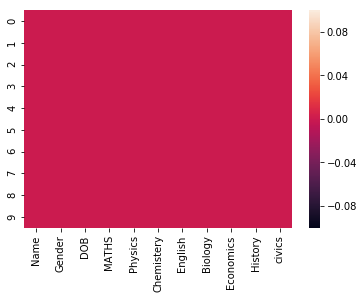

In [11]:
#check missing values
sns.heatmap(df.isnull())
#dataset has no missing values

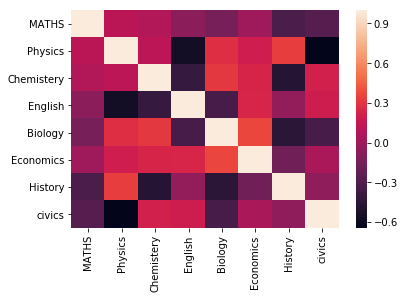

In [12]:
#Visualize correaltion
sns.heatmap(dfcor)

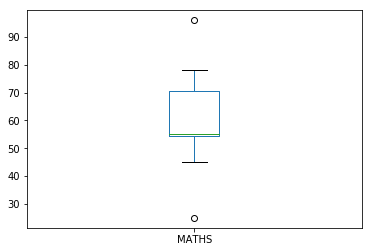

In [13]:
#to check any outliers using boxplot(univariate)
df["MATHS"].plot.box()

In [14]:
collist=df.columns.values
ncol=11
nrows=10

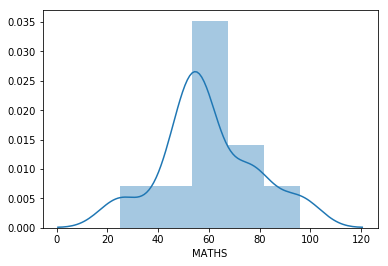

In [15]:
#Skewness distribution
sns.distplot(df["MATHS"])

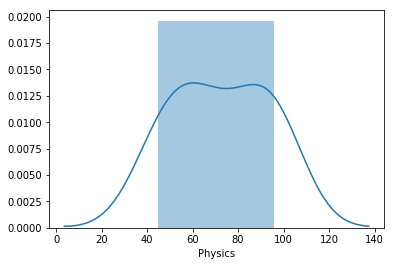

In [16]:
sns.distplot(df["Physics"])

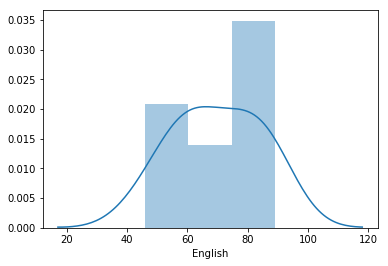

In [17]:
sns.distplot(df["English"])

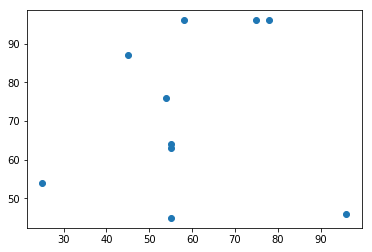

In [18]:
#Scatter plot(bivariate)
plt.scatter(df["MATHS"],df["Physics"])

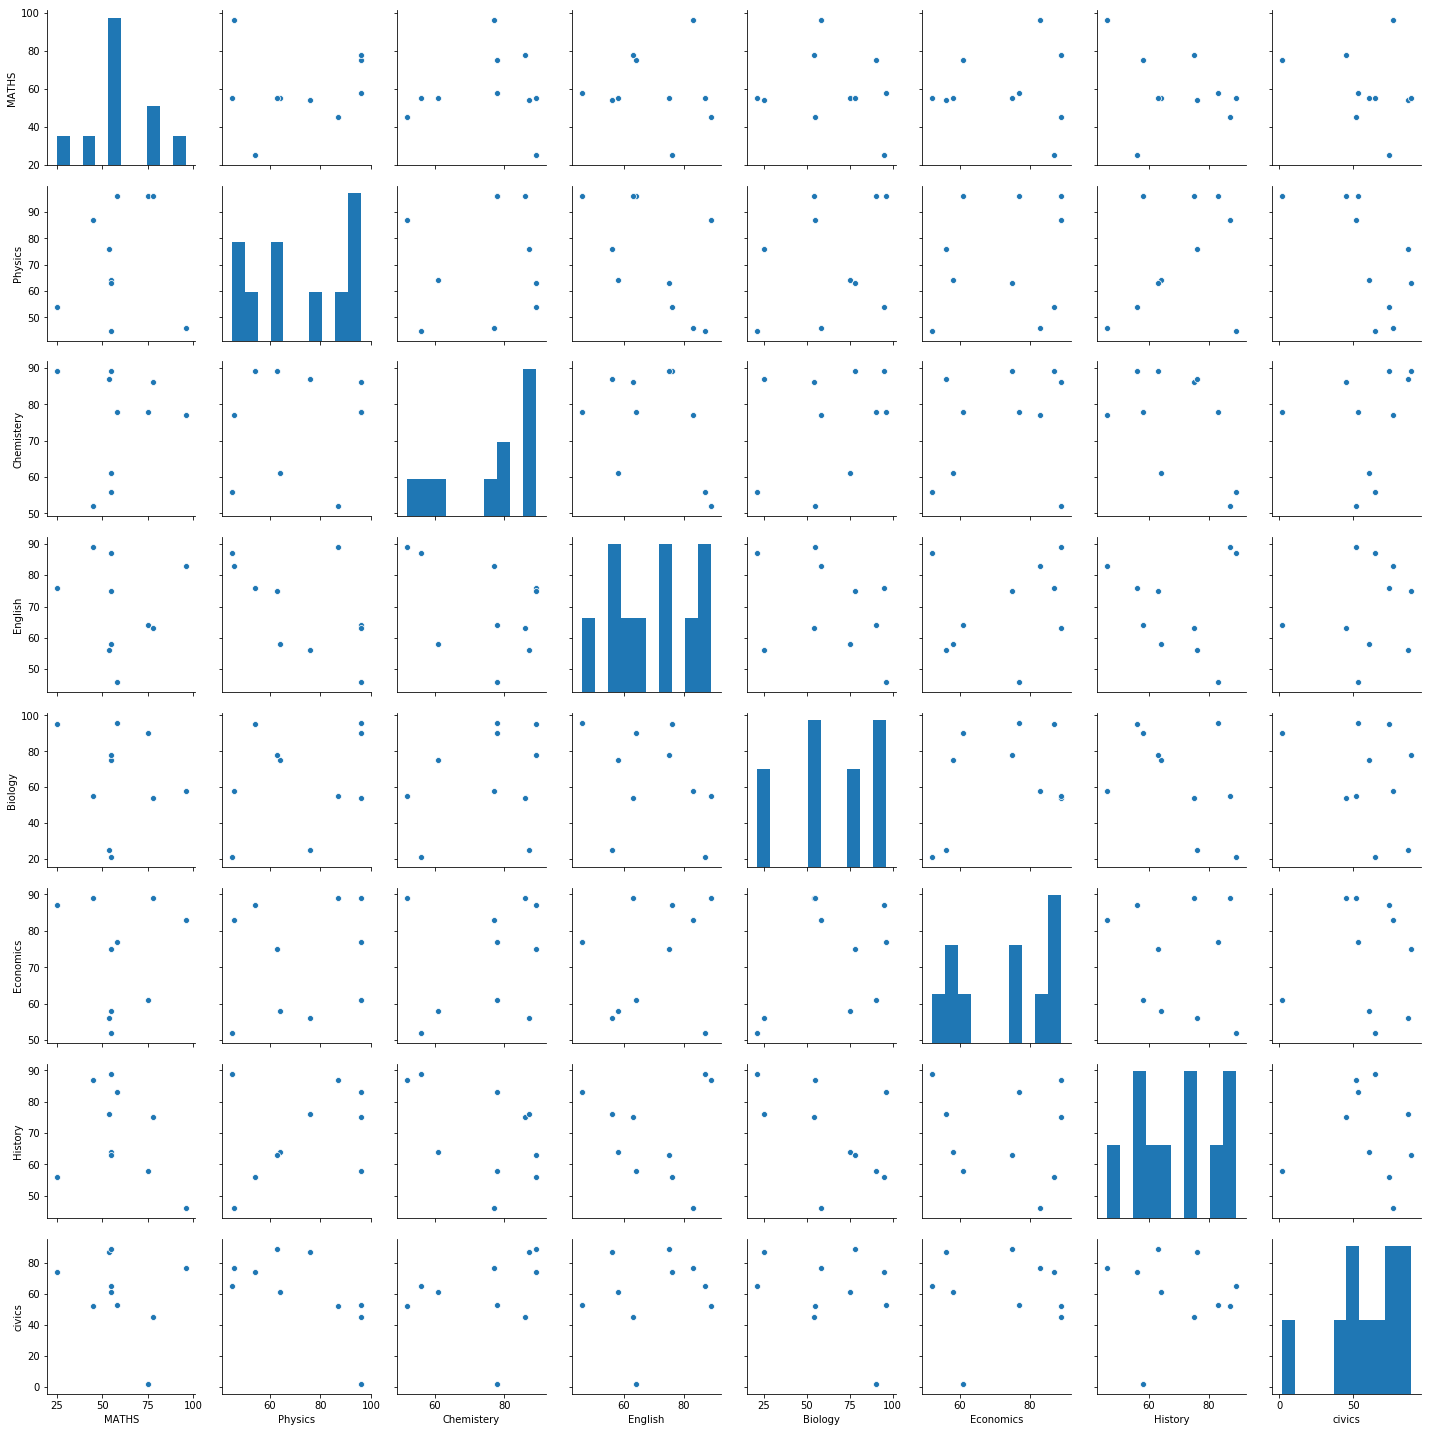

In [19]:
sns.pairplot(df)

In [21]:
df.drop("DOB", axis=1, inplace=True)
df

,Name,Gender,MATHS,Physics,Chemistery,English,Biology,Economics,History,civics
0,John,M,55,45,56,87,21,52,89,65
1,Suresh,M,75,96,78,64,90,61,58,2
2,Ramesh,M,25,54,89,76,95,87,56,74
3,Jessica,F,78,96,86,63,54,89,75,45
4,Jennifer,F,58,96,78,46,96,77,83,53
5,Annu,F,45,87,52,89,55,89,87,52
6,pooja,F,55,64,61,58,75,58,64,61
7,Ritesh,M,54,76,87,56,25,56,76,87
8,Farha,F,55,63,89,75,78,75,63,89
9,Mukesh,M,96,46,77,83,58,83,46,77


In [22]:
df.drop("Name", axis=1, inplace=True)
df

,Gender,MATHS,Physics,Chemistery,English,Biology,Economics,History,civics
0,M,55,45,56,87,21,52,89,65
1,M,75,96,78,64,90,61,58,2
2,M,25,54,89,76,95,87,56,74
3,F,78,96,86,63,54,89,75,45
4,F,58,96,78,46,96,77,83,53
5,F,45,87,52,89,55,89,87,52
6,F,55,64,61,58,75,58,64,61
7,M,54,76,87,56,25,56,76,87
8,F,55,63,89,75,78,75,63,89
9,M,96,46,77,83,58,83,46,77


In [23]:
df.drop("Gender", axis=1, inplace=True)
df

,MATHS,Physics,Chemistery,English,Biology,Economics,History,civics
0,55,45,56,87,21,52,89,65
1,75,96,78,64,90,61,58,2
2,25,54,89,76,95,87,56,74
3,78,96,86,63,54,89,75,45
4,58,96,78,46,96,77,83,53
5,45,87,52,89,55,89,87,52
6,55,64,61,58,75,58,64,61
7,54,76,87,56,25,56,76,87
8,55,63,89,75,78,75,63,89
9,96,46,77,83,58,83,46,77


In [24]:
#to check outliers
from scipy.stats import zscore
z_score=abs(zscore(df))
print(df.shape)

(10, 8)


In [26]:
df=df.loc[(z_score<3).all(axis=1)]
print(df.shape)

(10, 8)


In [ ]:
#above output shows no outliers

In [27]:
#Treating Skewness
import numpy as np
for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df_[col])
df.skew()

MATHS         0.246964
Physics      -0.045336
Chemistery   -0.746462
English      -0.131222
Biology      -0.496446
Economics    -0.245555
History      -0.131222
civics       -1.332448
dtype: float64